In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn import decomposition

In [3]:
wine = pd.read_csv("C:/Users/himan/Documents/Books/Coding Project/Version 1/Databases/Datasets List1/KAGGLE/Wine Clustering/wine-clustering.csv")

In [4]:
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


### Initializing and Normalizing the training dataset

In [6]:
X_train_original = wine.sample(frac = .8, random_state = 25)
X_train = preprocessing.normalize(X_train_original)

### Finding the best 'k' using Elbow Method

C:\Users\himan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\himan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\himan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\himan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

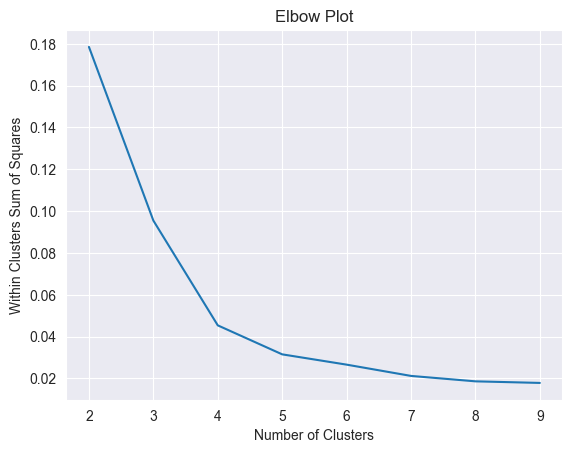

In [7]:
kmeans = [0, 1]
for i in range(2, 10):
    kmeans.append(KMeans(n_clusters = i, n_init = 'auto', max_iter = 300, random_state = 28).fit(X_train).inertia_)
    
    
sns.set_style('darkgrid')
sns.lineplot(x = np.arange(2, 10, 1), y = kmeans[2:])
plt.xticks(np.arange(2, 10, 1))
plt.xlabel('Number of Clusters')
plt.ylabel('Within Clusters Sum of Squares')
plt.title('Elbow Plot')

plt.show()

### Finding the best 'k' using Silhouette Scores

C:\Users\himan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\himan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\himan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\himan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

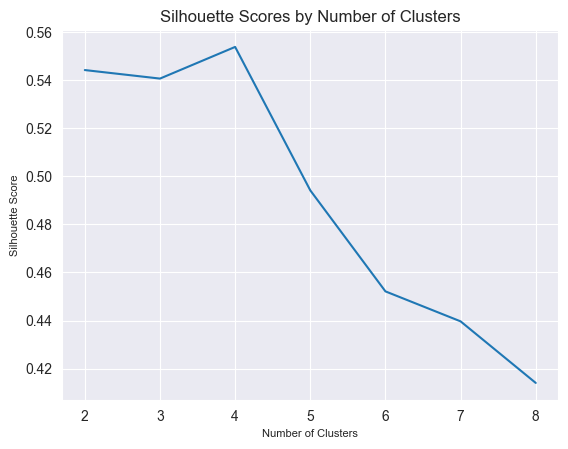

In [8]:
ss = []
for i in range(2, 9):
    obj = KMeans(n_clusters = i, random_state = 25, n_init = 'auto').fit(X_train)
    ss.append(metrics.silhouette_score(X_train, obj.labels_))
    

sns.lineplot(x = np.arange(2,9, 1), y = ss)
plt.xlabel('Number of Clusters', fontsize = 8)
plt.ylabel('Silhouette Score', fontsize = 8)
plt.title('Silhouette Scores by Number of Clusters')

plt.show()

### Model Creation

In [9]:
kmeans = KMeans(n_clusters = 4, n_init = 'auto').fit(X_train)

C:\Users\himan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Evaluation Metrics

In [10]:
print(f'Inertia (Within Clusters Sum of Squares): {kmeans.inertia_}')
print(f'Silhouette Score: {metrics.silhouette_score(X_train, kmeans.labels_)}')

Inertia (Within Clusters Sum of Squares): 0.0447537157383797
Silhouette Score: 0.5537573572817988


### Fitting the labels into the original test dataset

In [11]:
X_pred = X_train_original
X_pred.insert(column = 'pred_labels', value = kmeans.labels_, loc = 0)
X_pred.head()

,pred_labels,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
85,1,12.67,0.98,2.24,18.0,99,2.20,1.94,0.30,1.46,2.62,1.23,3.16,450
42,2,13.88,1.89,2.59,15.0,101,3.25,3.56,0.17,1.70,5.43,0.88,3.56,1095
43,0,13.24,3.98,2.29,17.5,103,2.64,2.63,0.32,1.66,4.36,0.82,3.00,680
40,0,13.56,1.71,2.31,16.2,117,3.15,3.29,0.34,2.34,6.13,0.95,3.38,795
75,1,11.66,1.88,1.92,16.0,97,1.61,1.57,0.34,1.15,3.80,1.23,2.14,428


### Demonstrating the relationship between the number of principal components and evaluation metrics

In [12]:
inertia_pca_d = dict()
ss_pca_d = dict()
pca_d = dict()

for i in range(2, 14):
    pca_d[i]  = decomposition.PCA(n_components = i).fit_transform(X_train)
    kmeans_pca = KMeans(n_clusters = 4, n_init = 'auto', random_state = 28).fit(pca_d[i])
    inertia_pca_d[i] = kmeans_pca.inertia_
    ss_pca_d[i] = metrics.silhouette_score(pca_d[i], kmeans_pca.labels_)

C:\Users\himan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\himan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\himan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\himan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

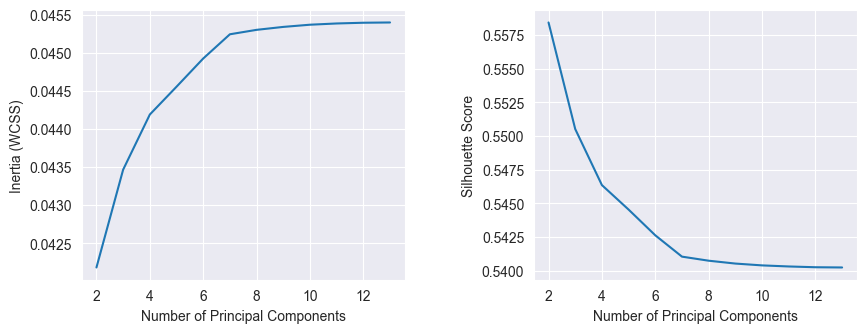

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (10, 3.5))

sns.lineplot(x = [key for key, val in inertia_pca_d.items()], y = [val for key, val in inertia_pca_d.items()], ax = ax[0])
ax[0].set_xlabel('Number of Principal Components')
ax[0].set_ylabel('Inertia (WCSS)')

sns.lineplot(x = [key for key, val in ss_pca_d.items()], y = [val for key, val in ss_pca_d.items()], ax = ax[1])
ax[1].set_xlabel('Number of Principal Components')
ax[1].set_ylabel('Silhouette Score')


plt.subplots_adjust(wspace = 0.4)
plt.show()



### Cluster illustration using two principal components

C:\Users\himan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


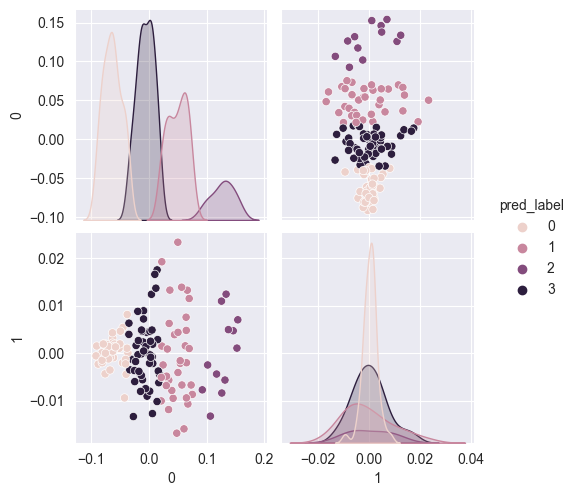

In [14]:
pca_2 = decomposition.PCA(n_components = 2).fit_transform(X_train)
kmeans_pca = KMeans(n_clusters = 4, n_init = 'auto', random_state = 28).fit(pca_2)

pca_2df = pd.DataFrame(data = pca_2, index = X_train_original.index)
pca_2df.insert(column = 'pred_label', value = kmeans_pca.labels_, loc = 2)


sns.pairplot(data = pca_2df, hue = 'pred_label')


plt.show()

### Predicting labels for new unseen data

In [38]:
index = wine.index.delete(X_train_original.index).values
X_test = wine.loc[index, :]

In [40]:
kmeans.predict(X_test`)

C:\Users\himan\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


array([2, 2, 0, 2, 2, 2, 2, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 3, 1, 0, 0, 0, 1, 0])